In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from tqdm import tqdm

In [2]:
sns.set_style('whitegrid')

In [3]:
# параметры расчёта
accepted = 1000000 # сумма принятых заказов за месяц
executed = 0.9600 # средняя исполняемость в процентах от принятых
margin = 0.4200 # средняя наценка

# количество менеджеров
managers_min = 2 # минимум
managers_max = 4 # максимум
managers_step = 1 # шаг изменения

# зарплата одного менеджера
salary_min = 50000 # минимум
salary_max = 90000 # максиимум
salary_step = 5000 # шаг изменения

# площадь розничной точки
square_min = 80 # минимум
square_max = 120 # максиимум
square_step = 2 # шаг изменения

# цена за квадратный метр
square_price_min = 900 # минимум
square_price_max = 1800 # максиимум
square_price_step = 50 # шаг изменения

In [4]:
df = pd.DataFrame()

# интервалы для подбора параметров
managers_range = range(managers_min, managers_max+1, managers_step)
salary_range = range(salary_min, salary_max+1, salary_step)
square_range = range(square_min, square_max+1, square_step)
square_price_range = range(square_price_min, square_price_max+1, square_price_step)

for i in tqdm(range(100000)):
    # определение параметров расчёта
    p_executed = 1
    while p_executed > 0.99:
        p_executed = np.round(np.random.normal(executed, 0.0199 / 5, 1)[0], decimals=4)
    p_margin = 1
    while p_margin > margin + 0.0199 * 5:
        p_margin = np.round(np.random.normal(margin, 0.0199 / 5, 1)[0], decimals=4)
    p_managers = np.random.choice(managers_range)
    p_salary = np.random.choice(salary_range)
    p_square = np.random.choice(square_range)
    p_square_price = np.random.choice(square_price_range)

    # расчёт прибыли с округлением до рубля
    profit = \
        accepted * p_executed * p_margin / (1 + p_margin) - \
        p_managers * p_salary - \
        p_square * p_square_price

    profit = np.round(profit, decimals=0)
    df = pd.concat([df, pd.DataFrame({'accepted': accepted,
                                      'executed': p_executed,
                                      'margin': p_margin,
                                      'managers': p_managers,
                                      'salary': p_salary,
                                      'square': p_square,
                                      'square_price': p_square_price,
                                      'profit': profit}, index=[0])],
                   ignore_index=True)
    
    df['result'] = np.where(df['profit'] > 0, 'прибыль', 
                            np.where(df['profit'] < 0, 'убыток', 'ноль'))

df = df[['accepted', 'executed', 'margin', 'managers', 'salary', 'square', 'square_price', 'profit', 'result']]

100%|███████████████████████████████████| 100000/100000 [32:57<00:00, 50.56it/s]


In [5]:
df['result'].value_counts(normalize=True).apply(lambda x: np.round(x * 100, decimals=2))

убыток     76.1
прибыль    23.9
ноль        0.0
Name: result, dtype: float64

In [6]:
df['profit'] \
    .describe(percentiles=np.linspace(10, 90, 9) / 100) \
    .apply(lambda x: np.round(x, decimals=2))

count    100000.00
mean     -61303.76
std       76952.31
min     -295465.00
10%     -169977.10
20%     -130324.20
30%     -100630.60
40%      -76380.00
50%      -54575.50
60%      -33749.80
70%      -13087.20
80%        8790.20
90%       34507.10
max      115739.00
Name: profit, dtype: float64

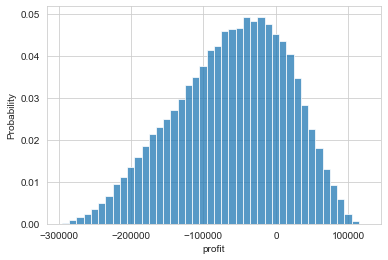

In [7]:
sns.histplot(df['profit'], stat='probability', binwidth=10000);

In [8]:
# добавляем столбец группировки по прибыли
freq = 10000
interval_range = pd.interval_range(start=np.floor(df['profit'].min() / freq) * freq,
                                   end=np.ceil(df['profit'].max() / freq) * freq,
                                   freq=freq,
                                   closed='left')
df['profit_interval'] = pd.cut(df['profit'], bins=interval_range)

In [12]:
df['profit_interval'].value_counts(normalize=True).iloc[:10] * 100

[-30000.0, -20000.0)    4.952
[-40000.0, -30000.0)    4.861
[-50000.0, -40000.0)    4.793
[-20000.0, -10000.0)    4.752
[-60000.0, -50000.0)    4.649
[-10000.0, 0.0)         4.647
[-70000.0, -60000.0)    4.569
[-80000.0, -70000.0)    4.471
[0.0, 10000.0)          4.464
[10000.0, 20000.0)      4.209
Name: profit_interval, dtype: float64